In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn import tree #决策树
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.model_selection  import train_test_split#测试集和训练集
from sklearn.pipeline import Pipeline #管道
from sklearn.feature_selection import SelectKBest #特征选择
from sklearn.feature_selection import chi2 #卡方统计量

from sklearn.preprocessing import MinMaxScaler  #数据归一化
from sklearn.decomposition import PCA #主成分分析
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证

In [20]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=FutureWarning)

iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

#读取数据
path = 'iris.data'  
data = pd.read_csv(path, header=None)
x=data[list(range(4))]#获取X变量

y=pd.Categorical(data[4]).codes#把Y转换成分类型的0,1,2
print("总样本数目：%d;特征属性数目:%d" % x.shape)

data.head(5)

总样本数目：150;特征属性数目:4


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, 
  train_size=0.8, random_state=14)

x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print("训练数据集样本数目：%d,测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

#astype：转换数组的数据类型。
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

训练数据集样本数目：120,测试数据集样本数目：30


In [22]:
#数据归一化
ss = MinMaxScaler ()
#用标准化方法对数据进行处理并转换
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-1.19444444 -0.83333333 -0.18965517 -0.04166667]
原始数据各个特征属性的缩放数据值: [0.27777778 0.41666667 0.17241379 0.41666667]


# Problem A

In [12]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=2)
dt_model.fit(x_train, y_train)
predict_y = dt_model.predict(x_test)
score = dt_model.score(x_test,y_test)

print(predict_y)
print('得分：',score)

[0 0 0 1 2 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0]
得分： 0.9666666666666667


In [6]:
def getscore(a,b):
    dt_model = DecisionTreeClassifier(max_depth=a,max_features=b)
    dt_model.fit(x_train, y_train)
    score = dt_model.score(x_test,y_test)

    print('max_depth=',a,'  max_features=',b,'  得分：',score)
    
a=1
while(a<=5):
    b=1
    while(b<=4):
        getscore(a,b)
        b=b+1
    a=a+1
    

max_depth= 1   max_features= 1   得分： 0.7
max_depth= 1   max_features= 2   得分： 0.7
max_depth= 1   max_features= 3   得分： 0.7
max_depth= 1   max_features= 4   得分： 0.7
max_depth= 2   max_features= 1   得分： 0.9666666666666667
max_depth= 2   max_features= 2   得分： 0.9666666666666667
max_depth= 2   max_features= 3   得分： 0.9666666666666667
max_depth= 2   max_features= 4   得分： 0.9666666666666667
max_depth= 3   max_features= 1   得分： 1.0
max_depth= 3   max_features= 2   得分： 1.0
max_depth= 3   max_features= 3   得分： 0.9666666666666667
max_depth= 3   max_features= 4   得分： 0.9666666666666667
max_depth= 4   max_features= 1   得分： 0.9333333333333333
max_depth= 4   max_features= 2   得分： 0.9666666666666667
max_depth= 4   max_features= 3   得分： 0.9666666666666667
max_depth= 4   max_features= 4   得分： 0.9666666666666667
max_depth= 5   max_features= 1   得分： 0.8666666666666667
max_depth= 5   max_features= 2   得分： 0.9666666666666667
max_depth= 5   max_features= 3   得分： 0.9666666666666667
max_depth= 5   max_feature

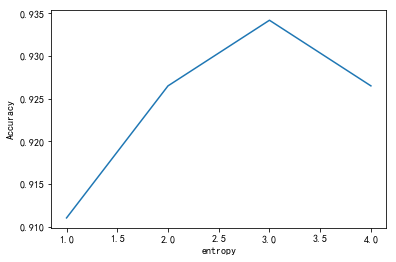

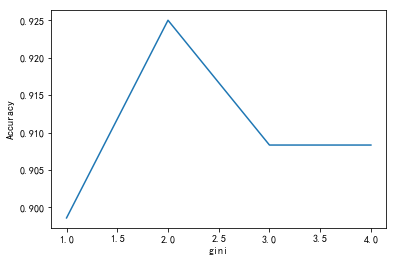

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证
from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means
import matplotlib.pyplot as plt

k_range = range(1,5)
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    dt_model = DecisionTreeClassifier(max_features=n,criterion='entropy')
    scores = cross_val_score(dt_model,x_train,y_train,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('entropy')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

k_range = range(1,5)
cv_scores = []
for n in k_range:
    dt_model = DecisionTreeClassifier(max_features=n,criterion='gini')
    scores = cross_val_score(dt_model,x_train,y_train,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('gini')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

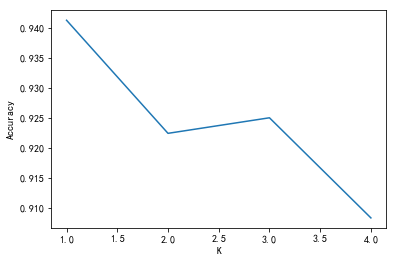

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证
import matplotlib.pyplot as plt

k_range = range(1,5)
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    dt_model = DecisionTreeClassifier(max_features=n,)
    scores = cross_val_score(dt_model,x_train,y_train,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

# Problem B

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, 
  train_size=0.7, random_state=14)

x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print("训练数据集样本数目：%d,测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

#astype：转换数组的数据类型。
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

训练数据集样本数目：105,测试数据集样本数目：45


In [26]:
rf0 = RandomForestClassifier(criterion='entropy',n_estimators=10)
rf0.fit(x_train, y_train)
score = rf0.score(x_test,y_test)

print('得分：',score)

得分： 0.9555555555555556


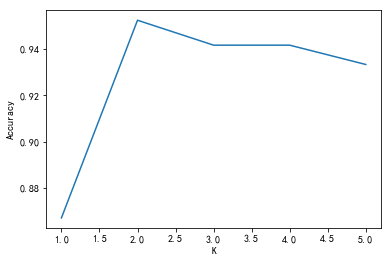

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证
import matplotlib.pyplot as plt

k_range = range(1,6)
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    rf0 = RandomForestClassifier(max_depth=n)
    scores = cross_val_score(rf0,x_train,y_train,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

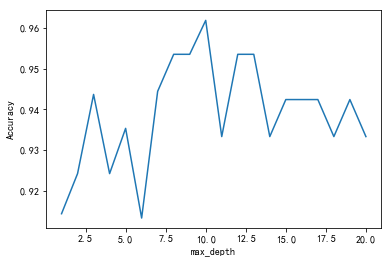

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证
import matplotlib.pyplot as plt

k_range = range(1,21)
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    rf0 = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf0,x_train,y_train,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()